In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Users/vidhanmanihar/Desktop/untitled folder/DSML/Practical/eleven/IRIS.csv')


In [2]:
# -------------------------
# **11. (1) List features + types**
# -------------------------

print("FEATURES AND THEIR TYPES:\n")
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        print(f"{col} → Numeric")
    else:
        print(f"{col} → Nominal")

# Show table
print("\nComplete Data Types:\n")
print(df.dtypes)

FEATURES AND THEIR TYPES:

sepal_length → Numeric
sepal_width → Numeric
petal_length → Numeric
petal_width → Numeric
species → Nominal

Complete Data Types:

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


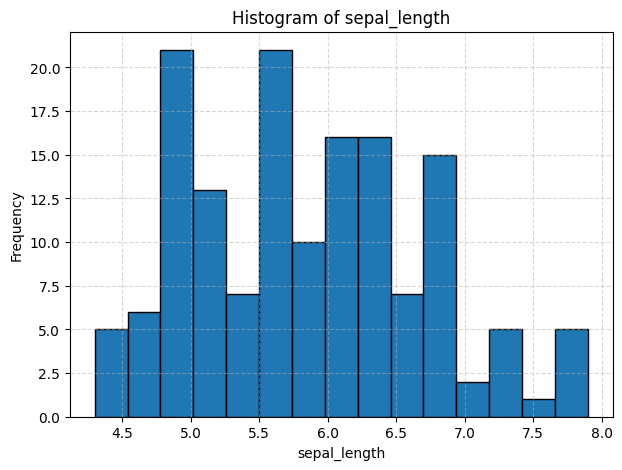

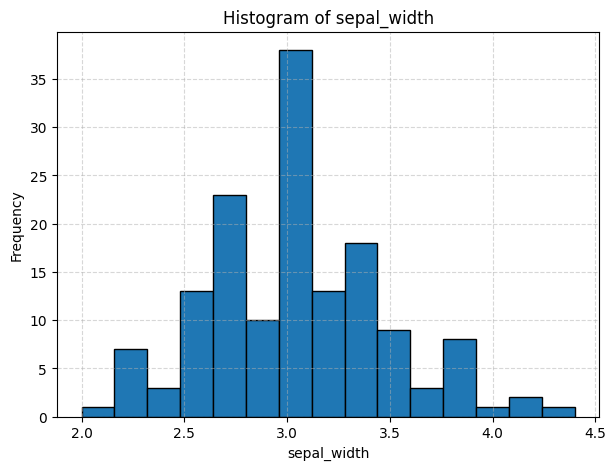

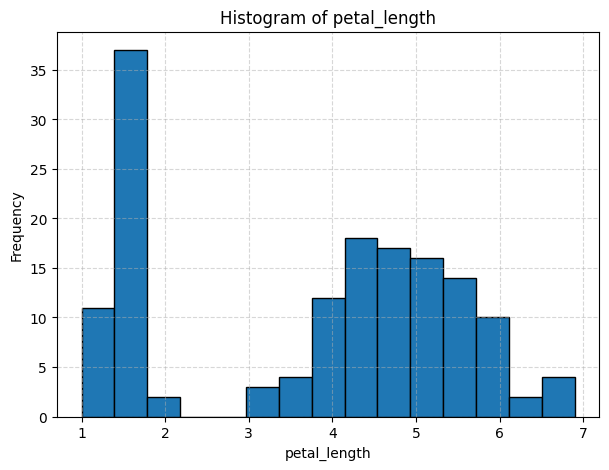

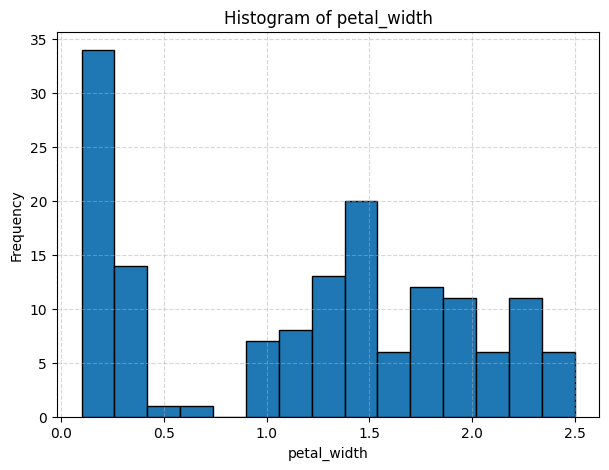

In [3]:

# -------------------------
# **11. (2) HISTOGRAMS FOR EACH FEATURE**
# -------------------------

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(7,5))
    plt.hist(df[col], bins=15, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


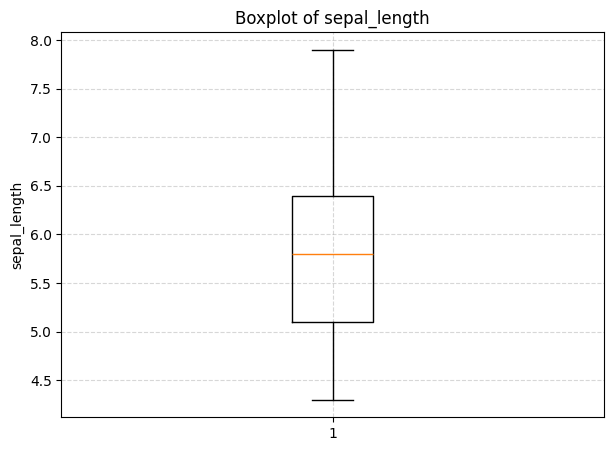

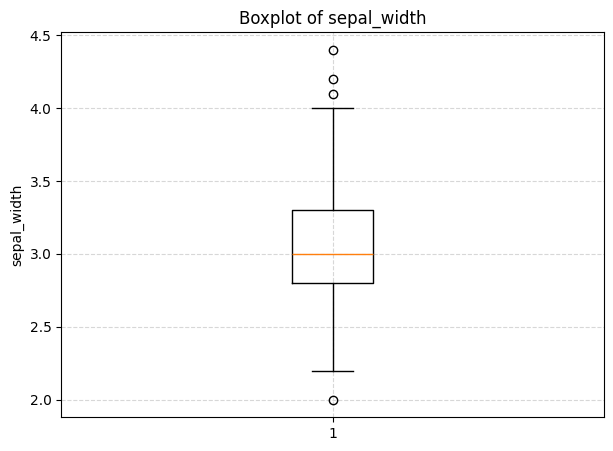

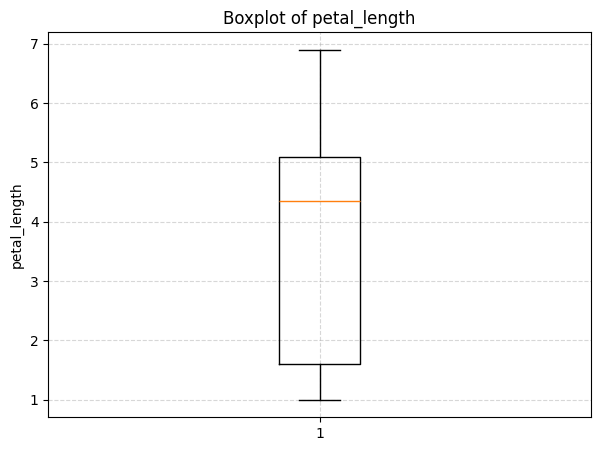

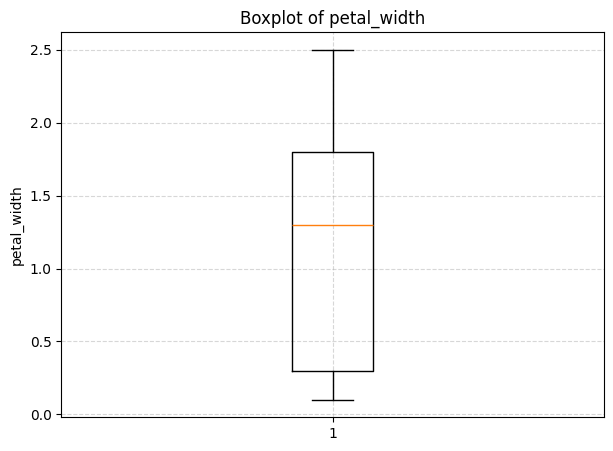

In [4]:
# -------------------------
# **12. (1) BOX PLOTS FOR EACH FEATURE**
# -------------------------

for col in numeric_cols:
    plt.figure(figsize=(7,5))
    plt.boxplot(df[col], vert=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

In [5]:
# -------------------------
# **12. (2) OUTLIER DETECTION USING IQR**
# -------------------------

print("\nOUTLIER SUMMARY (IQR METHOD):\n")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    print(f"--- {col} ---")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower:.2f}, Upper Bound = {upper:.2f}")
    print(f"Outliers Count = {outliers.shape[0]}")
    print(f"Outlier Values = {list(outliers.values)}\n")


OUTLIER SUMMARY (IQR METHOD):

--- sepal_length ---
Q1 = 5.10, Q3 = 6.40, IQR = 1.30
Lower Bound = 3.15, Upper Bound = 8.35
Outliers Count = 0
Outlier Values = []

--- sepal_width ---
Q1 = 2.80, Q3 = 3.30, IQR = 0.50
Lower Bound = 2.05, Upper Bound = 4.05
Outliers Count = 4
Outlier Values = [np.float64(4.4), np.float64(4.1), np.float64(4.2), np.float64(2.0)]

--- petal_length ---
Q1 = 1.60, Q3 = 5.10, IQR = 3.50
Lower Bound = -3.65, Upper Bound = 10.35
Outliers Count = 0
Outlier Values = []

--- petal_width ---
Q1 = 0.30, Q3 = 1.80, IQR = 1.50
Lower Bound = -1.95, Upper Bound = 4.05
Outliers Count = 0
Outlier Values = []

